In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
%matplotlib inline

In [2]:
def reformat_data(data):
    
    # Reformat column names
    new_col_name = []
    for item1, item2 in zip(data.columns.values, data.iloc[0,:]):
        new_col_name.append(item1+'('+item2+')')
    data.columns = new_col_name
    data.drop(0,axis=0, inplace=True)
    data.drop(data.columns[0],axis=1, inplace=True)
    data.reset_index(drop=True, inplace=True)

    for item in data.columns:
        data[item] = pd.to_numeric(data[item], errors='ignore')

    # Convert unix timestamp to human timestamp
    data['timestamp(s)'] = pd.to_datetime(data['timestamp(s)'], unit='s') 
    
    # Convert angle unit from radians to degress
    data['phaseA.current.angle(rad)'] = np.degrees(data['phaseA.current.angle(rad)'])
    data['phaseB.current.angle(rad)'] = np.degrees(data['phaseB.current.angle(rad)'])
    data['phaseC.current.angle(rad)'] = np.degrees(data['phaseC.current.angle(rad)'])
    
    data['phaseA.voltage.angle(rad)'] = np.degrees(data['phaseA.voltage.angle(rad)'])
    data['phaseB.voltage.angle(rad)'] = np.degrees(data['phaseB.voltage.angle(rad)'])
    data['phaseC.voltage.angle(rad)'] = np.degrees(data['phaseC.voltage.angle(rad)'])
    
    data.rename(columns = {'phaseA.current.angle(rad)':'phaseA.current.angle(deg)',
                          'phaseB.current.angle(rad)':'phaseB.current.angle(deg)',
                          'phaseC.current.angle(rad)':'phaseC.current.angle(deg)',
                          'phaseA.voltage.angle(rad)':'phaseA.voltage.angle(deg)',
                          'phaseB.voltage.angle(rad)':'phaseB.voltage.angle(deg)',
                          'phaseC.voltage.angle(rad)':'phaseC.voltage.angle(deg)'}, inplace=True)
    
    return data

In [3]:
# Read and format EPFL data
epfl_PMU2 = pd.read_csv('2016-05-02_09h_UTC_PMUID2.csv')
epfl_PMU3 = pd.read_csv('2016-05-02_09h_UTC_PMUID3.csv')
epfl_PMU4 = pd.read_csv('2016-05-02_09h_UTC_PMUID4.csv')
epfl_PMU5 = pd.read_csv('2016-05-02_09h_UTC_PMUID5.csv')

epfl_PMU2 = reformat_data(epfl_PMU2)
epfl_PMU3 = reformat_data(epfl_PMU3)
epfl_PMU4 = reformat_data(epfl_PMU4)
epfl_PMU5 = reformat_data(epfl_PMU5)

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning:

Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.



In [48]:
for item in epfl_PMU3.columns:
    print(item+": ", epfl_PMU2[item].dtype)

GPS-locked?(flag):  int64
timestamp(s):  datetime64[ns]
delay-at-arrival(s):  float64
frequency(Hz):  float64
rocof(Hz/s):  float64
phaseA.voltage.magnitude(V):  float64
phaseA.voltage.angle(deg):  float64
phaseA.current.magnitude(A):  float64
phaseA.current.angle(deg):  float64
phaseB.voltage.magnitude(V):  float64
phaseB.voltage.angle(deg):  float64
phaseB.current.magnitude(A):  float64
phaseB.current.angle(deg):  float64
phaseC.voltage.magnitude(V):  float64
phaseC.voltage.angle(deg):  float64
phaseC.current.magnitude(A):  float64
phaseC.current.angle(deg):  float64


In [ ]:
# Create a trace
trace = go.Scattergl(
    x = epfl_PMU2['timestamp(s)'],
    y = np.degrees(epfl_PMU2['phaseA.voltage.angle(rad)']),
    mode = 'markers'
)

data = [trace]

# Plot and embed in ipython notebook!
py.iplot(data, filename='basic-scatter')

## Visualisation of Quantities for Four PMUs

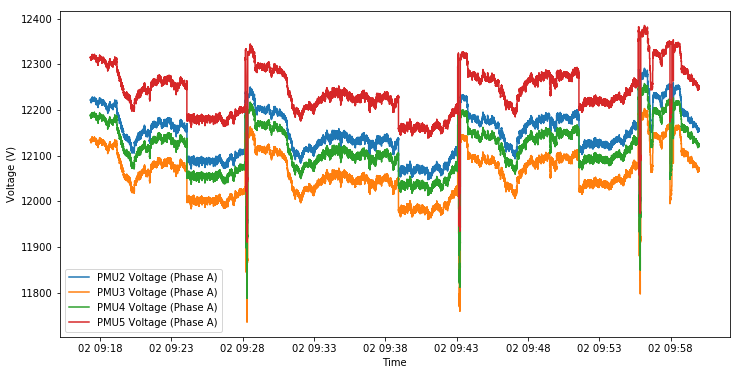

In [84]:
plt.figure(figsize=[12,6])

plt.plot('timestamp(s)', 'phaseA.voltage.magnitude(V)', data=epfl_PMU2)
plt.plot('timestamp(s)', 'phaseA.voltage.magnitude(V)', data=epfl_PMU3)
plt.plot('timestamp(s)', 'phaseA.voltage.magnitude(V)', data=epfl_PMU4)
plt.plot('timestamp(s)', 'phaseA.voltage.magnitude(V)', data=epfl_PMU5)

plt.legend(['PMU2 Voltage (Phase A)','PMU3 Voltage (Phase A)','PMU4 Voltage (Phase A)', 'PMU5 Voltage (Phase A)' ])
plt.xlabel('Time')
plt.ylabel('Voltage (V)')
pass

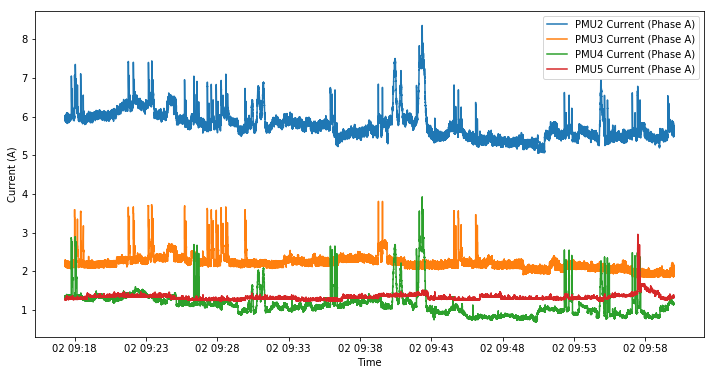

In [85]:
plt.figure(figsize=[12,6])

plt.plot('timestamp(s)', 'phaseA.current.magnitude(A)', data=epfl_PMU2)
plt.plot('timestamp(s)', 'phaseA.current.magnitude(A)', data=epfl_PMU3)
plt.plot('timestamp(s)', 'phaseA.current.magnitude(A)', data=epfl_PMU4)
plt.plot('timestamp(s)', 'phaseA.current.magnitude(A)', data=epfl_PMU5)

plt.legend(['PMU2 Current (Phase A)','PMU3 Current (Phase A)','PMU4 Current (Phase A)', 'PMU5 Current (Phase A)' ])
plt.xlabel('Time')
plt.ylabel('Current (A)')
pass

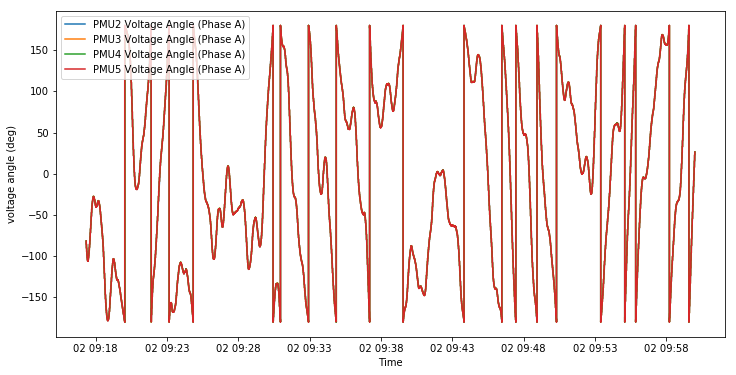

In [86]:
plt.figure(figsize=[12,6])

plt.plot('timestamp(s)', 'phaseA.voltage.angle(deg)', data=epfl_PMU2)
plt.plot('timestamp(s)', 'phaseA.voltage.angle(deg)', data=epfl_PMU3)
plt.plot('timestamp(s)', 'phaseA.voltage.angle(deg)', data=epfl_PMU4)
plt.plot('timestamp(s)', 'phaseA.voltage.angle(deg)', data=epfl_PMU5)

plt.legend(['PMU2 Voltage Angle (Phase A)','PMU3 Voltage Angle (Phase A)',
            'PMU4 Voltage Angle (Phase A)', 'PMU5 Voltage Angle (Phase A)' ])
plt.xlabel('Time')
plt.ylabel('voltage angle (deg)')
pass

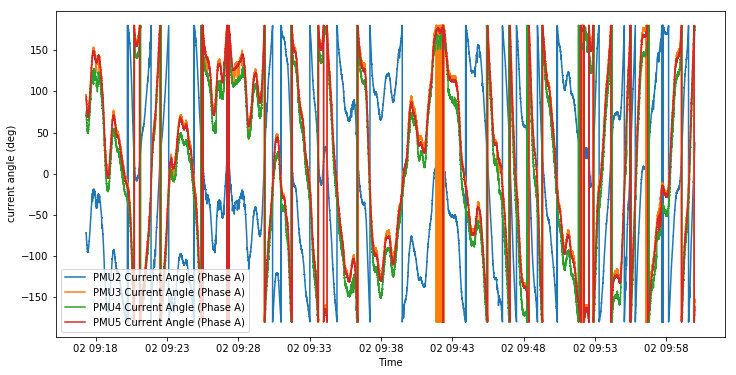

In [87]:
plt.figure(figsize=[12,6])

plt.plot('timestamp(s)', 'phaseA.current.angle(deg)', data=epfl_PMU2)
plt.plot('timestamp(s)', 'phaseA.current.angle(deg)', data=epfl_PMU3)
plt.plot('timestamp(s)', 'phaseA.current.angle(deg)', data=epfl_PMU4)
plt.plot('timestamp(s)', 'phaseA.current.angle(deg)', data=epfl_PMU5)

plt.legend(['PMU2 Current Angle (Phase A)','PMU3 Current Angle (Phase A)',
            'PMU4 Current Angle (Phase A)', 'PMU5 Current Angle (Phase A)' ])
plt.xlabel('Time')
plt.ylabel('current angle (deg)')
pass

## Visualisation of quantities for three phases

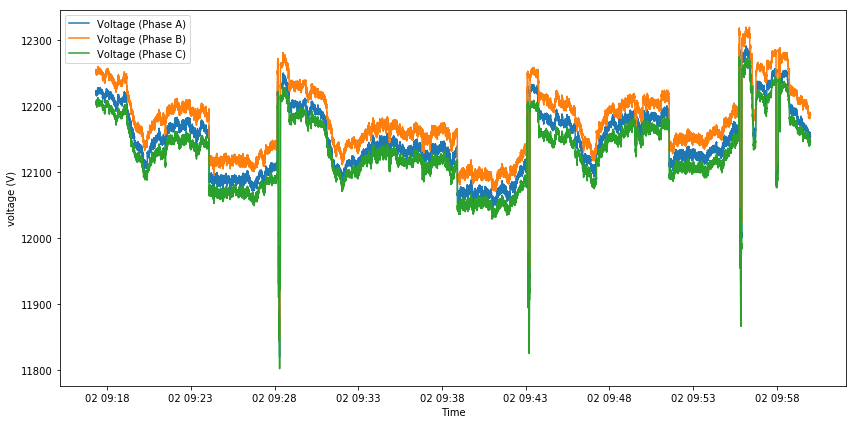

In [88]:
plt.figure(figsize=[12,6])
plt.plot('timestamp(s)', 'phaseA.voltage.magnitude(V)', data=epfl_PMU2)
plt.plot('timestamp(s)', 'phaseB.voltage.magnitude(V)', data=epfl_PMU2)
plt.plot('timestamp(s)', 'phaseC.voltage.magnitude(V)', data=epfl_PMU2)
plt.legend(['Voltage (Phase A)','Voltage (Phase B)','Voltage (Phase C)' ])
plt.xlabel('Time')
plt.ylabel('voltage (V)')
plt.tight_layout()

## Visualisation of Three Quantities (Freq, Vol, Cur) under Phase A

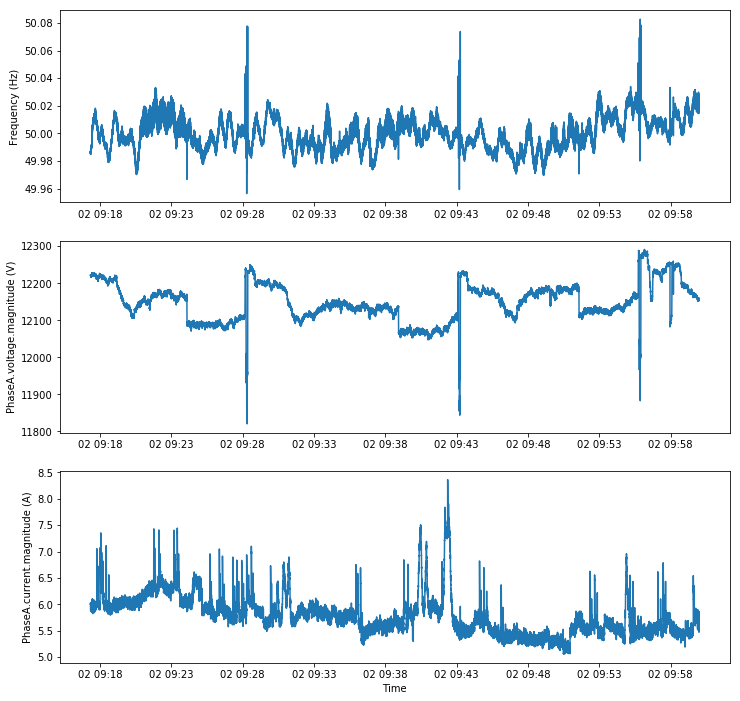

In [93]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(12,12))
plt.subplot(311)
plt.plot('timestamp(s)', 'frequency(Hz)', data=epfl_PMU2)
plt.ylabel('Frequency (Hz)')
plt.subplot(312)
plt.plot('timestamp(s)', 'phaseA.voltage.magnitude(V)', data=epfl_PMU2)
plt.ylabel('PhaseA.voltage.magnitude (V)')
plt.subplot(313)
plt.plot('timestamp(s)', 'phaseA.current.magnitude(A)', data=epfl_PMU2)
plt.xlabel('Time')
plt.ylabel('PhaseA.current.magnitude (A)')

## Empirical Distribution

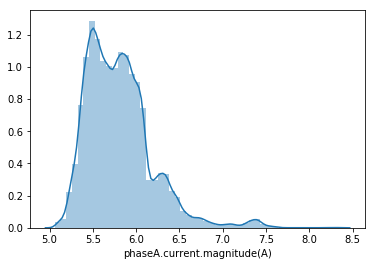

In [94]:
sns.distplot(epfl_PMU2['phaseA.current.magnitude(A)'])

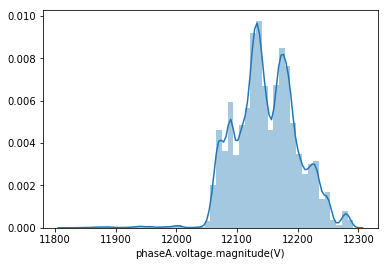

In [12]:
sns.distplot(epfl_data['phaseA.voltage.magnitude(V)'])

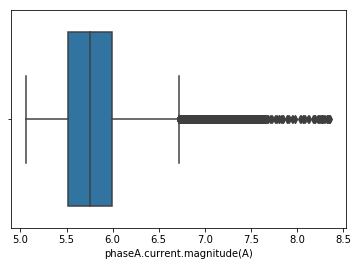

In [13]:
sns.boxplot(epfl_data['phaseA.current.magnitude(A)'])

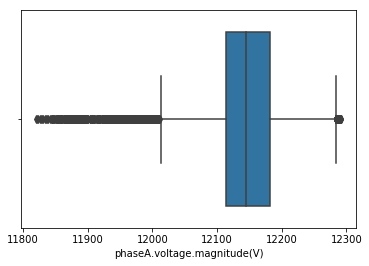

In [14]:
sns.boxplot(epfl_data['phaseA.voltage.magnitude(V)'])

## Lag Plots

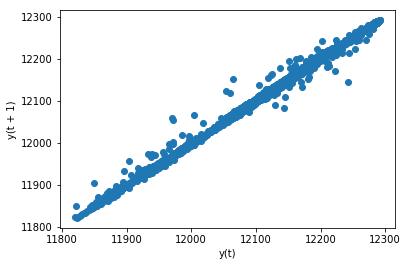

In [15]:
pd.plotting.lag_plot(epfl_data['phaseA.voltage.magnitude(V)'])

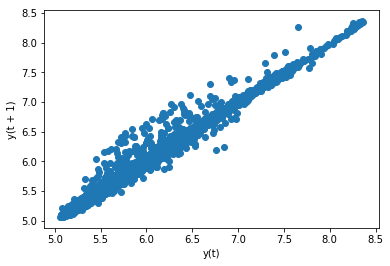

In [16]:
pd.plotting.lag_plot(epfl_data['phaseA.current.magnitude(A)'])

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



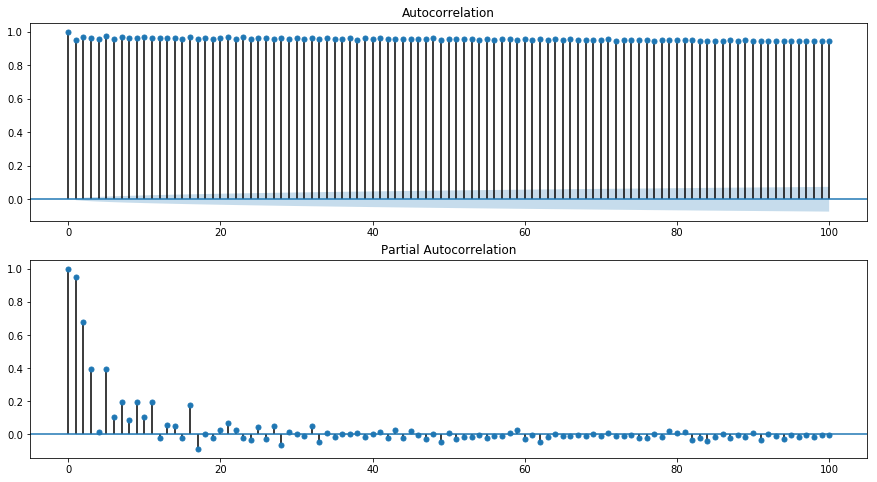

In [17]:
import statsmodels.api as sm
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(epfl_data['frequency(Hz)'], lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(epfl_data['frequency(Hz)'], lags=100, ax=ax2)

# Test Anomaly Detection Algorithms

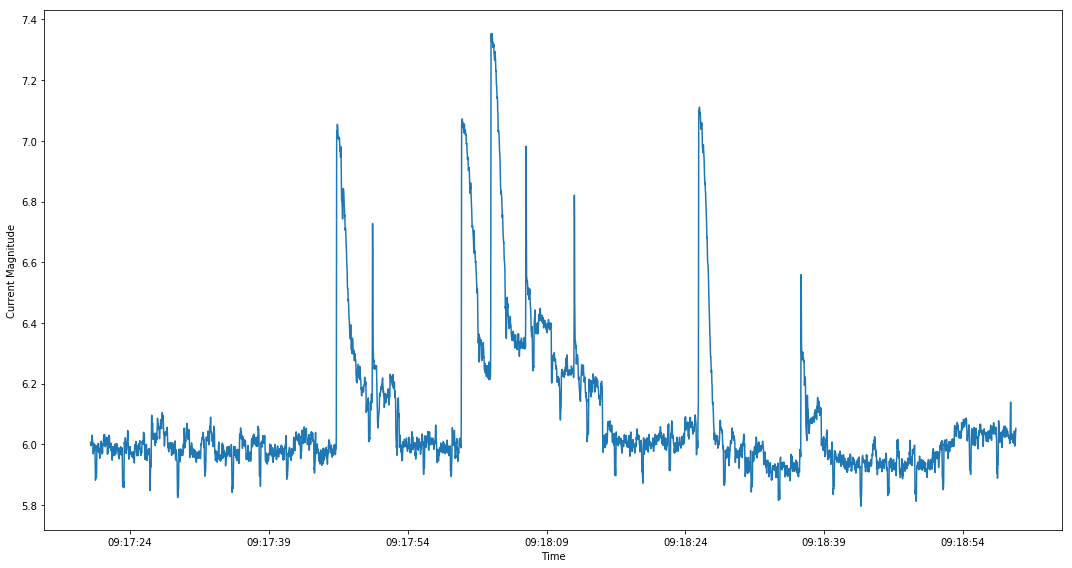

In [26]:
%run "Moving_Average_Using_Discrete_Linear_Convolution"

pmu_current_data = epfl_data['phaseA.current.magnitude(A)']
end_data_point = 5000  #-1 for the whole data set
sliding_window = 3000  #3000 means 1 min window

x = epfl_data['timestamp(s)'][:end_data_point]
Y = pmu_current_data[:end_data_point]

plt.figure(figsize=(15,8))
plt.xlabel("Time")
plt.ylabel("Current Magnitude")
plt.plot('timestamp(s)', 'phaseA.current.magnitude(A)', data=epfl_data.iloc[:end_data_point, :])
plt.tight_layout()

## 1. Moving Average using Discrete Linear Convolution

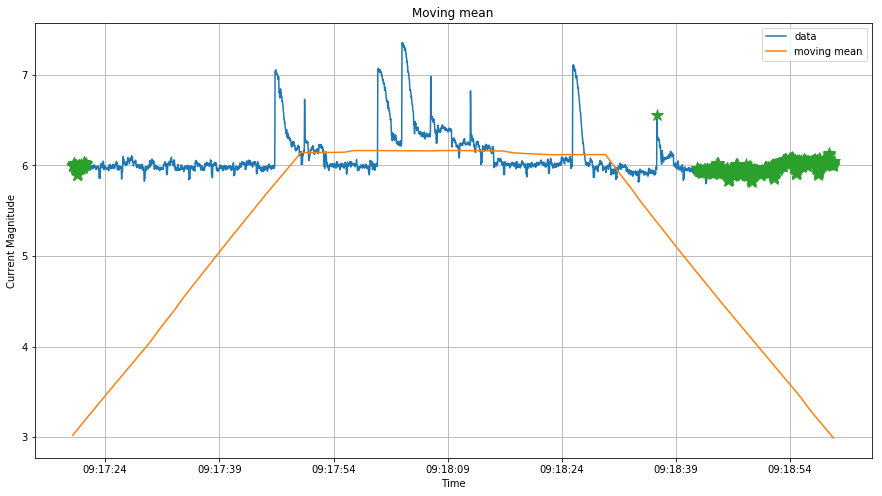

In [27]:
#Moving average based on discrete linear convolution
events_mean = plot_results(x, y=Y, window_size=sliding_window, mode="mean", text_xlabel="Time", sigma_value=3,
             text_ylabel="Current Magnitude", applying_rolling_std=True)

## 2. Moving Median

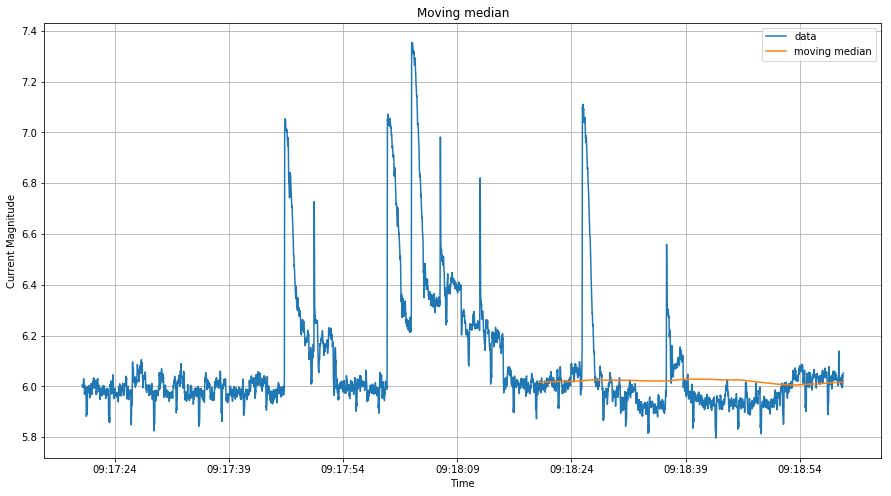

In [28]:
#Moving median
events_median = plot_results(x, y=Y, window_size=sliding_window, mode="median", text_xlabel="Time", sigma_value=3,
             text_ylabel="Current Magnitude", applying_rolling_std=True)

## 3. CUSUM

In [29]:
#CUSUM Method
def tabular_cusum(data,mu,k,sigma):
    C_plus_res = []
    C_minus_res = []
    C_plus = 0
    C_minus = 0
    K = k*sigma
    for i in data.index:
        x = data.loc[i]
        C_plus = max(0, x-(mu+K)+C_plus)
        C_minus = max(0, (mu-K)-x+C_minus)
        C_plus_res.append(C_plus)
        C_minus_res.append(C_minus)
    return C_plus_res, C_minus_res

# alarm: h*sigma
def cusum_plot(plus,minus,h,sigma):
    plt.figure(figsize=(15,6))
    plt.plot(plus, 'bo-', label='C+') 
    plt.plot(minus, 'go-', label='C-')
    plt.title('Tabular CUSUM Chart')
    plt.axhline(y=h*sigma, linewidth=2, color = 'r', label='Alarm')
    plt.legend()
    plt.show()

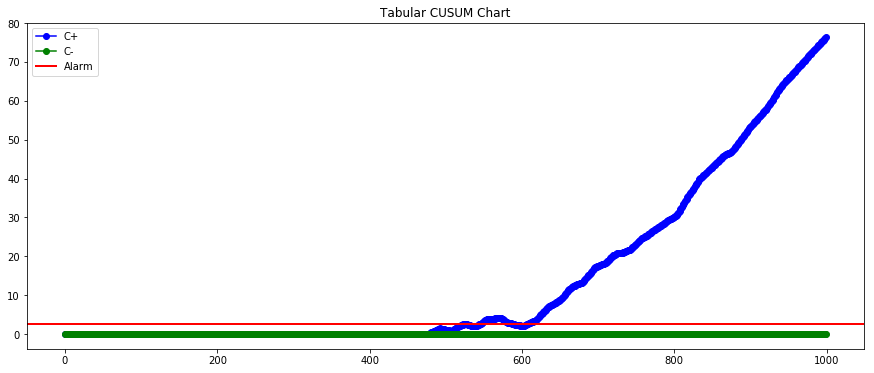

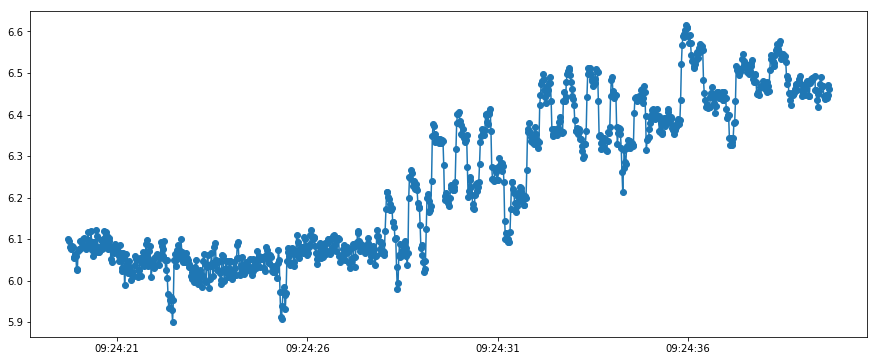

In [30]:
data_start = 21000
data_end = data_start+1000

#CUSUM chart control parameters
mu = 6
k = 0.5
h = 5
sigma = 0.5

plus, minus = tabular_cusum(pmu_current_data[data_start:data_end], mu, k, sigma)
cusum_plot(plus, minus, h,sigma)

plt.figure(figsize=(15,6))
plt.plot('timestamp(s)', 'phaseA.current.magnitude(A)', "o-", data=epfl_data[data_start:data_end])

# Lit Review Paper Implementation

## Paper: "Dimensionality reduction of synchrophasor data for early event detection: Linearized analysis"

In [5]:
# EPFL data
epfl_data_ID2 = pd.read_csv('2016-05-02_09h_UTC_PMUID2.csv')
epfl_data_ID3 = pd.read_csv('2016-05-02_09h_UTC_PMUID3.csv')
epfl_data_ID4 = pd.read_csv('2016-05-02_09h_UTC_PMUID4.csv')
epfl_data_ID5 = pd.read_csv('2016-05-02_09h_UTC_PMUID5.csv')

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.



In [6]:
epfl_data_ID2 = reformat_data(epfl_data_ID2)
epfl_data_ID3 = reformat_data(epfl_data_ID3)
epfl_data_ID4 = reformat_data(epfl_data_ID4)
epfl_data_ID5 = reformat_data(epfl_data_ID5)

Set up $Y_{nxN}$, the measurement matrix

In [7]:
measurement = 'phaseA.voltage.magnitude(V)'

ID2_sample_V_100 = epfl_data_ID2[measurement][:100]
ID3_sample_V_100 = epfl_data_ID3[measurement][:100]
ID4_sample_V_100 = epfl_data_ID4[measurement][:100]
ID5_sample_V_100 = epfl_data_ID5[measurement][:100]

Y_v = pd.DataFrame({'ID2': ID2_sample_V_100,
                    'ID3': ID3_sample_V_100,
                    'ID4': ID4_sample_V_100,
                    'ID5': ID5_sample_V_100})

Y_v.head()

,ID2,ID3,ID4,ID5
0,12221.70703,12134.33496,12187.87012,12314.43066
1,12221.94043,12134.36816,12188.34375,12314.96680
2,12222.26465,12134.44727,12188.67188,12315.20703
3,12222.12598,12134.69824,12188.52539,12314.91211
4,12222.34863,12134.61719,12188.76367,12315.51562


In [197]:
centered_Y = Y_v-Y_v.mean()

1) Calculate the covariance matrix of $Y_{nxN}: C_Y := Y^T_{nxN}Y_{nxN}$

In [274]:
import scipy as sp
cov_Y = sp.cov(centered_Y, rowvar=False)

In [275]:
cov_Y

array([[ 1.7335 ,  1.66339,  1.78179,  1.68328],
       [ 1.66339,  1.68774,  1.7399 ,  1.66728],
       [ 1.78179,  1.7399 ,  2.00772,  1.77821],
       [ 1.68328,  1.66728,  1.77821,  1.76193]])

 2) Calculate the $N$ eigenvalues and eigenvectors of $C_Y$

In [276]:
# eigen decomposition using covariance matrix
e, v = sp.linalg.eig(cov_Y)
print("Eigenvalues: ", e)
print("Eigenvetors: \n", v)

Eigenvalues:  [ 6.96108+0.j  0.11966+0.j  0.04447+0.j  0.06568+0.j]
Eigenvetors: 
 [[ 0.49301  0.14922  0.66379 -0.54227]
 [ 0.48544  0.38422 -0.71402 -0.32697]
 [ 0.52557 -0.83601 -0.13201  0.08618]
 [ 0.49504  0.3622   0.17925  0.76916]]


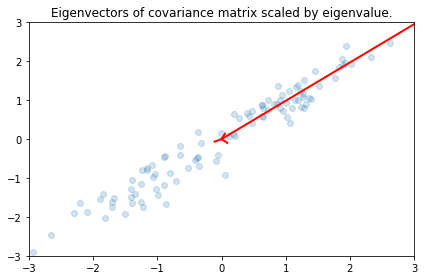

In [277]:
plt.scatter(centered_Y.iloc[:,0], centered_Y.iloc[:,1], alpha=0.2)
for e_, v_ in zip(np.real_if_close(e), v.T):
    plt.plot([0, 3*e_*v_[0]], [0, 3*e_*v_[1]], 'r-', lw=2)
plt.axis([-3,3,-3,3])
plt.title('Eigenvectors of covariance matrix scaled by eigenvalue.')
plt.tight_layout()

In [278]:
# eigen decomposition using XX^T/(n-1)
e1, v1 = np.linalg.eig(np.dot(centered_Y.T, centered_Y)/(len(centered_Y)-1))

In [279]:
print(np.real_if_close(e))
print(e1)

[ 6.96108  0.11966  0.04447  0.06568]
[ 6.96108  0.11966  0.04447  0.06568]


In [280]:
v1

array([[ 0.49301,  0.14922,  0.66379, -0.54227],
       [ 0.48544,  0.38422, -0.71402, -0.32697],
       [ 0.52557, -0.83601, -0.13201,  0.08618],
       [ 0.49504,  0.3622 ,  0.17925,  0.76916]])

In [282]:
# eigenvectors of the covariance matrix is orthogonal
np.dot(v1,v1.T)

array([[  1.00000e+00,   2.74780e-15,  -2.22045e-15,   5.60663e-15],
       [  2.74780e-15,   1.00000e+00,   2.44249e-15,  -6.85563e-15],
       [ -2.22045e-15,   2.44249e-15,   1.00000e+00,  -1.69309e-15],
       [  5.60663e-15,  -6.85563e-15,  -1.69309e-15,   1.00000e+00]])

In [283]:
D = np.diag(e1)
D

array([[ 6.96108,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.11966,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  0.04447,  0.     ],
       [ 0.     ,  0.     ,  0.     ,  0.06568]])

In [288]:
(D[0,0]+D[1,1])/D.trace()

0.98468203231227691

In [290]:
# select the top 2 PCs as subspace basis
top_2_PCs = v[:, :2]
top_2_PCs

array([[ 0.49301,  0.14922],
       [ 0.48544,  0.38422],
       [ 0.52557, -0.83601],
       [ 0.49504,  0.3622 ]])

In [291]:
# projection of original data onto subspace formed by top 2 PCs
ys = np.dot(top_2_PCs.T, centered_Y.T)

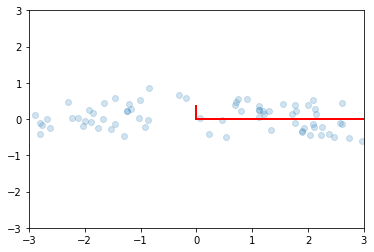

In [292]:
# visualise transformed data in the basis of first two eigenvectors
plt.scatter(ys[0,:], ys[1,:], alpha=0.2)
for e_, v_ in zip(e1, np.eye(2)):
    plt.plot([0, 3*e_*v_[0]], [0, 3*e_*v_[1]], 'r-', lw=2)
plt.axis([-3,3,-3,3]);

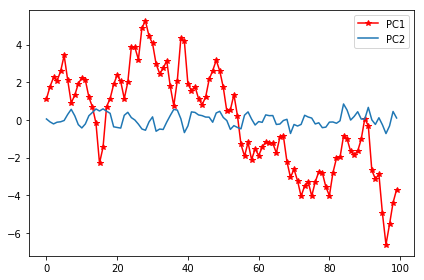

In [294]:
# visualisation of data projected on each principal components
plt.plot(ys[0,:], 'r*-')
plt.plot(ys[1,:])
#plt.plot(ys[2,:])
#plt.plot(ys[3,:])
plt.legend(['PC1', 'PC2', 'PC3', 'PC4'])
plt.tight_layout()

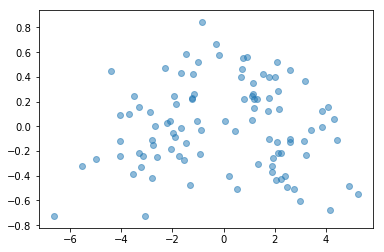

In [301]:
plt.scatter(ys[0,:], ys[1,:], alpha=0.5)
pass

In [302]:
# transform back to original feature coordinates
zs = np.dot(top_2_PCs, ys)

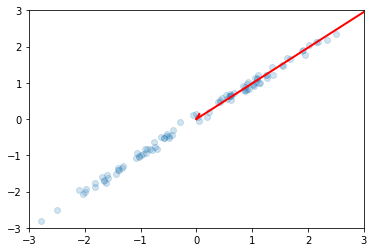

In [311]:
plt.scatter(zs[0,:], zs[1,:], alpha=0.2)
for e_, v_ in zip(e1, top_2_PCs.T):
    plt.plot([0, 3*e_*v_[0]], [0, 3*e_*v_[1]], 'r-', lw=2)
plt.axis([-3,3,-3,3]);

In [320]:
from sklearn.decomposition.pca import PCA

pca = PCA()
pca.fit(Y_v)
pca.explained_variance_ratio_

array([ 0.96804,  0.01664,  0.00913,  0.00618])

3) Rearrange the $N$ eigenvalues in decreasing order, with the eigenvectors being the principal components (PCs).

4) Out of the $N$ PCs, select the highest $m$, which preserve a cumulative variance satisfying $\sum^m_{i=1} var_i \ge \tau$. $\tau$ is a pre-defined variance threshold, and $m \ll N$.
ID2 is selected as the 1 PC

5) Form a new $m$-dimensional subspace from the top $m$ PCs.

6) Project the original variables onto the $m$-dimensional PC-based space. The $m'$ variables are henceforth denoted as the “pilot PMUs”.

7) Represent the non-pilot PMUs $y^{(i)}$ in terms of $Y_B$. Obtain the linear regression coefficients $v^{(i)} := (Y^T_BY_B)^{-1}Y^T_By^{(i)}$

## Paper: "Line Outage Localization Using Phasor Measurement Data in Transient State"

### Constructing predictors ($\textbf{x}$)
#### Fast Fourier transform on voltage angle data

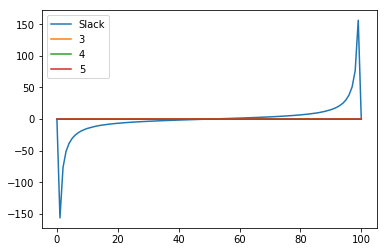

In [123]:
def  extract_features(pmu_data):
    # Continuous signal
    pmu = pmu_data[1:101]
    pmu_fft = np.fft.fft(pmu)
    pmu_imag = pmu_fft.imag.tolist()

    # Instantaneous jump
    pmu_jump = pmu[1] - pmu_data[0]

    pmu_imag.append(pmu_jump)
    
    return pmu_imag
    pass

# Features from slack bus
slack = extract_features(epfl_PMU2['phaseA.voltage.angle(deg)'])

# Features from all other buses
pmu3 = extract_features(epfl_PMU3['phaseA.voltage.angle(deg)'] - epfl_PMU2['phaseA.voltage.angle(deg)'])
pmu4 = extract_features(epfl_PMU4['phaseA.voltage.angle(deg)'] - epfl_PMU2['phaseA.voltage.angle(deg)'])
pmu5 = extract_features(epfl_PMU5['phaseA.voltage.angle(deg)'] - epfl_PMU2['phaseA.voltage.angle(deg)'])

plt.plot(slack)
plt.plot(pmu3)
plt.plot(pmu4)
plt.plot(pmu5)
plt.legend(['Slack', '3', '4', '5'])
pass

# Build the single vector of predictors
X = slack + pmu3 + pmu4 + pmu5

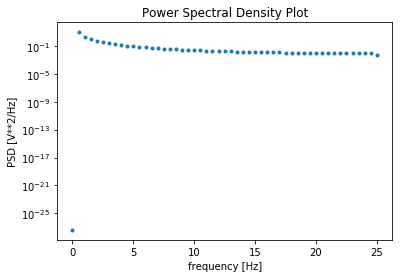

In [104]:
from scipy import signal
f, Pxx_den = signal.periodogram(epfl_PMU2['phaseA.voltage.angle(deg)'].head(100), 50, return_onesided=True)
plt.semilogy(f, Pxx_den, '.')
#plt.ylim([1e-7, 1e2])
plt.title('Power Spectral Density Plot')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()